https://medium.com/@a.mirzaei69/implement-a-neural-network-from-scratch-with-python-numpy-backpropagation-e82b70caa9bb

loss = 29.723490450503732


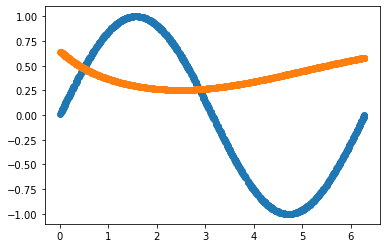

In [15]:
import numpy as np

class NeuralNetwork(object):
    def __init__(self, layers = [2 , 10, 1], activations=['sigmoid', 'sigmoid']):
        assert(len(layers) == len(activations)+1)
        self.layers = layers
        self.activations = activations
        self.weights = []
        self.biases = []
        for i in range(len(layers)-1):
            self.weights.append(np.random.randn(layers[i+1], layers[i]))
            self.biases.append(np.random.randn(layers[i+1], 1))
    
    def feedforward(self, x):
        # return the feedforward value for x
        a = np.copy(x)
        z_s = []
        a_s = [a]
        for i in range(len(self.weights)):
            activation_function = self.getActivationFunction(self.activations[i])
            z_s.append(self.weights[i].dot(a) + self.biases[i])
            a = activation_function(z_s[-1])
            a_s.append(a)
        return (z_s, a_s)

    def backpropagation(self,y, z_s, a_s):
            dw = []  # dC/dW
            db = []  # dC/dB
            deltas = [None] * len(self.weights)  # delta = dC/dZ  known as error for each layer
            # insert the last layer error
            deltas[-1] = ((y-a_s[-1])*(self.getDerivitiveActivationFunction(self.activations[-1]))(z_s[-1]))
            # Perform BackPropagation
            for i in reversed(range(len(deltas)-1)):
                deltas[i] = self.weights[i+1].T.dot(deltas[i+1])*(self.getDerivitiveActivationFunction(self.activations[i])(z_s[i]))        
            #a= [print(d.shape) for d in deltas]
            batch_size = y.shape[1]
            db = [d.dot(np.ones((batch_size,1)))/float(batch_size) for d in deltas]
            dw = [d.dot(a_s[i].T)/float(batch_size) for i,d in enumerate(deltas)]
            # return the derivitives respect to weight matrix and biases
            return dw, db
            
    def train(self, x, y, batch_size=10, epochs=100, lr = 0.01):
    # update weights and biases based on the output
            for e in range(epochs): 
                i=0
                while(i<len(y)):
                    x_batch = x[i:i+batch_size]
                    y_batch = y[i:i+batch_size]
                    i = i+batch_size
                    z_s, a_s = self.feedforward(x_batch)
                    dw, db = self.backpropagation(y_batch, z_s, a_s)
                    self.weights = [w+lr*dweight for w,dweight in  zip(self.weights, dw)]
                    self.biases = [w+lr*dbias for w,dbias in  zip(self.biases, db)]
                    print("loss = {}".format(np.linalg.norm(a_s[-1]-y_batch) ))
    @staticmethod
    def getActivationFunction(name):
        if(name == 'sigmoid'):
            return lambda x : np.exp(x)/(1+np.exp(x))
        elif(name == 'linear'):
            return lambda x : x
        elif(name == 'relu'):
            def relu(x):
                y = np.copy(x)
                y[y<0] = 0
                return y
            return relu
        else:
            print('Unknown activation function. linear is used')
            return lambda x: x
    
    @staticmethod
    def getDerivitiveActivationFunction(name):
        if(name == 'sigmoid'):
            sig = lambda x : np.exp(x)/(1+np.exp(x))
            return lambda x :sig(x)*(1-sig(x)) 
        elif(name == 'linear'):
            return lambda x: 1
        elif(name == 'relu'):
            def relu_diff(x):
                y = np.copy(x)
                y[y>=0] = 1
                y[y<0] = 0
                return y
            return relu_diff
        else:
            print('Unknown activation function. linear is used')
            return lambda x: 1

if __name__=='__main__':
    import matplotlib.pyplot as plt
    nn = NeuralNetwork([1, 100, 1],activations=['sigmoid', 'sigmoid'])
    X = 2*np.pi*np.random.rand(1000).reshape(1, -1)
    y = np.sin(X)
    
    nn.train(X, y, epochs=1, batch_size=64, lr = .1)
    _, a_s = nn.feedforward(X)
    #print(y, X)
    plt.scatter(X.flatten(), y.flatten())
    plt.scatter(X.flatten(), a_s[-1].flatten())
    plt.show()